In [ ]:
from gGA.data import block_to_feature
from ase.io import read
from gGA.data import AtomicData
from gGA.utils.make_kpoints import kmesh_sampling
from gGA.nn.ghostG import GhostGutzwiller
import numpy as np

# setup_seed(1234)

U = 5.5
J = 0. # 0.25 * U
Up = U - 2*J
Jp = J

gga = GhostGutzwiller(
    atomic_number=np.array([6, 14]),
    nocc=2,
    basis={"C":[1], "Si":[1]},
    idx_intorb={"C":[0], "Si":[0]},
    naux=3,
    intparams={"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}], "Si":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]},
    nspin=2,
    kBT=0.0002,
    mutol=1e-7,
    solver="ED",
    mixer_options={"method": "Linear", "a": 0.3},
    iscomplex=True,
    solver_options={}# {"mfepmin":500, "channels": 10},
)

t = -1.
t_ = 0.3
delta = 0.9
tp = - t_ * (1+delta)
tm = - t_ * (1-delta)

block = {
    "0_0_0_0_0": np.zeros((1,1)),
    "1_1_0_0_0": np.zeros((1,1)),
    
    # 1nn for 0
    "0_1_0_0_0": np.array([[t]]),
    "0_1_-1_0_0": np.array([[t]]),
    "0_1_0_-1_0": np.array([[t]]),
    "0_1_-1_-1_0": np.array([[t]]),
    
    # 1nn for 1
    "1_0_0_0_0": np.array([[t]]),
    "1_0_0_1_0": np.array([[t]]),
    "1_0_1_1_0": np.array([[t]]),
    "1_0_1_0_0": np.array([[t]]),

    # 2nn for 0
    "0_0_-1_0_0": np.array([[tp]]),
    "0_0_1_0_0": np.array([[tp]]),
    "0_0_0_1_0": np.array([[tm]]),
    "0_0_0_-1_0": np.array([[tm]]),

    # 2nn for 1
    "1_1_-1_0_0": np.array([[tm]]),
    "1_1_1_0_0": np.array([[tm]]),
    "1_1_0_1_0": np.array([[tp]]),
    "1_1_0_-1_0": np.array([[tp]]),
}

for k in block:
    block[k] = np.kron(block[k], np.eye(2))

atomicdata = AtomicData.from_ase(
    read("/nessa/users/zhanghao/dev/Hubbard/gGA/test/am.vasp"),
    r_max=2.7
    )

atoms = atomicdata.to_ase()

atomicdata["kpoint"] = kmesh_sampling([20,20,1], True)
block_to_feature(atomicdata, gga.kinetic.idp_phy, block)
atomicdata = AtomicData.to_AtomicDataDict(atomicdata)
atomicdata = gga.kinetic.idp_phy(atomicdata)

In [2]:
gga.run(atomicdata, 1000, 1e-5)

DM_kin:  [0.03191244 0.03191244 0.11769245 0.11769245 0.23982625 0.23982625
 0.6146526  0.6146526  0.99756875 0.99756875 0.99834749 0.99834749]
 -- Current error: 2.06613
DM_kin:  [5.37520910e-04 5.37520910e-04 4.11563237e-03 4.11563237e-03
 3.03729477e-01 3.03729477e-01 6.91806378e-01 6.91806378e-01
 9.99859982e-01 9.99859982e-01 9.99951009e-01 9.99951009e-01]
 -- Current error: 1.21167
DM_kin:  [8.67109284e-04 8.67109284e-04 2.43656496e-03 2.43656496e-03
 3.05815035e-01 3.05815035e-01 6.91104836e-01 6.91104836e-01
 9.99836676e-01 9.99836676e-01 9.99939779e-01 9.99939779e-01]
 -- Current error: 0.80924
DM_kin:  [9.25538748e-04 9.25538748e-04 2.36654337e-03 2.36654337e-03
 3.06358710e-01 3.06358710e-01 6.90632909e-01 6.90632909e-01
 9.99797763e-01 9.99797763e-01 9.99918537e-01 9.99918537e-01]
 -- Current error: 0.55392
DM_kin:  [0.00101227 0.00101227 0.00244634 0.00244634 0.30684607 0.30684607
 0.69005516 0.69005516 0.99974813 0.99974813 0.99989204 0.99989204]
 -- Current error: 0.4045

In [1]:
from gGA.data import block_to_feature
from ase.io import read
from gGA.data import AtomicData
from gGA.utils.make_kpoints import kmesh_sampling
from gGA.nn.ghostG import GhostGutzwiller
from gGA.utils.tools import setup_seed
import numpy as np

# setup_seed(1234)
U = 5.5
J = 0. # 0.25 * U
Up = 0. #U - 2*J
Jp = J

gga = GhostGutzwiller(
    atomic_number=np.array([6]),
    nocc=2,
    basis={"C":[2]},
    idx_intorb={"C":[0]},
    naux=3,
    intparams={"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]},
    nspin=2,
    kBT=0.0002,
    mutol=1e-7,
    solver="ED",
    mixer_options={"method": "Linear", "a": 0.3},
    iscomplex=True,
    solver_options={}# {"mfepmin":500, "channels": 10},
)

t = -1.
t_ = 0.3
delta = 0.9
tp = - t_ * (1+delta)
tm = - t_ * (1-delta)

block = {
    "0_0_0_0_0":  np.array([[0.,t],[t, 0.]]),
    # 1nn 
    "0_0_-1_0_0": np.array([[tp,t],[0.,tm]]),
    "0_0_0_-1_0": np.array([[tm,t],[0.,tp]]),
    "0_0_-1_-1_0":np.array([[0.,t],[0.,0.]]),
    "0_0_0_1_0":  np.array([[tm,0.],[t,tp]]),
    "0_0_1_1_0":  np.array([[0.,0.],[t,0.]]),
    "0_0_1_0_0":  np.array([[tp,0.],[t,tm]]),

}

for k in block:
    block[k] = np.kron(block[k], np.eye(2))

atomicdata = AtomicData.from_ase(
    read("/nessa/users/zhanghao/dev/Hubbard/gGA/test/am2o.vasp"),
    r_max=3.8
    )

atoms = atomicdata.to_ase()

atomicdata["kpoint"] = kmesh_sampling([20,20,1], True)
block_to_feature(atomicdata, gga.kinetic.idp_phy, block)
atomicdata = AtomicData.to_AtomicDataDict(atomicdata)

In [2]:
U = 3.5
J = 0.5 * U
Up = 0. # U - 2*J
Jp = 0. # J

gga.update_intparam({"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]})
gga.run(atomicdata, 1000, 1e-5)

DM_kin:  [0.0011736  0.0011736  0.04655735 0.04655735 0.41345684 0.41345684
 0.54065903 0.54065903 0.99840971 0.99840971 0.99974347 0.99974347]
 -- Current error: 0.86707
DM_kin:  [0.00460072 0.00460072 0.03825421 0.03825421 0.42728024 0.42728024
 0.53107242 0.53107242 0.99893496 0.99893496 0.99985745 0.99985745]
 -- Current error: 0.98475
DM_kin:  [0.00821463 0.00821463 0.01448721 0.01448721 0.44894474 0.44894474
 0.52913718 0.52913718 0.99944737 0.99944737 0.99976887 0.99976887]
 -- Current error: 0.71221
DM_kin:  [0.00644341 0.00644341 0.00999789 0.00999789 0.47465942 0.47465942
 0.50960703 0.50960703 0.99956196 0.99956196 0.99973029 0.99973029]
 -- Current error: 0.47778
DM_kin:  [0.00470815 0.00470815 0.00981905 0.00981905 0.48045877 0.48045877
 0.50572519 0.50572519 0.99957427 0.99957427 0.99971458 0.99971458]
 -- Current error: 0.28307
DM_kin:  [0.0041868  0.0041868  0.00878501 0.00878501 0.4598828  0.4598828
 0.52795263 0.52795263 0.99952172 0.99952172 0.99967105 0.99967105]
 -

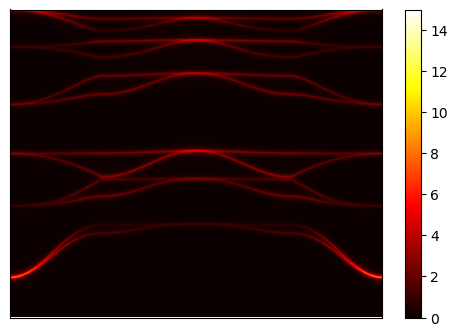

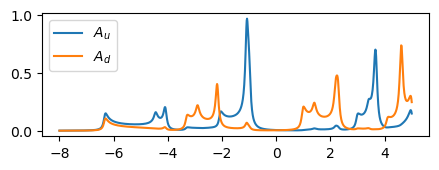

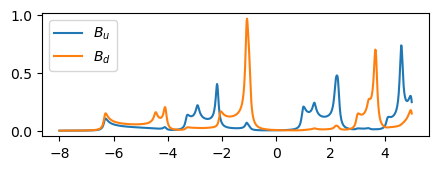

In [3]:
from gGA.utils.make_kpoints import abacus_kpath

kpoints, xpath, _ = abacus_kpath(
    atoms, 
    np.array([
        [0,0,0,200],
        [0.25,0.25,0,200],
        [0.0,0.5,0,200],
        [-0.25,0.25,0,200],
        [0,0,0,1]
    ])
    )

data = atomicdata.copy()
kpoints[:,:2] = np.stack([kpoints[:,:2].sum(-1), kpoints[:,0] - kpoints[:,1]], axis=-1)
data["kpoint"] = kpoints

Es = np.linspace(-8,5, 1000) + gga.E_fermi
GF = gga.compute_GF(Es=Es, data=data, eta=0.06)
ARPES = -(1/np.pi)*GF.imag.diagonal(offset=0, axis1=-1, axis2=-2)
pdos = ARPES.sum(0) / ARPES.shape[0]
pdos = pdos.reshape(-1,4)
dos = pdos.sum(-1)
ARPES = ARPES.sum(-1)


import matplotlib.pyplot as plt
ARPES = np.flip(ARPES, (0,1))
fig, ax = plt.subplots(figsize=(6,4))
m = ax.matshow(ARPES.T, cmap="hot", vmin=0, vmax=15)
ax.set_aspect('auto')  # override the default 'equal'
ax.set_xticks([])
ax.set_yticks([])
fig.colorbar(m)
plt.show()

plt.figure(figsize=(5,1.6))
# plt.plot(Es, dos)
plt.plot(Es-gga.E_fermi, pdos[:,:2])
plt.legend([f"$A_u$", f"$A_d$"])
plt.show()
plt.figure(figsize=(5,1.6))
plt.plot(Es-gga.E_fermi, pdos[:,2:])
plt.legend([f"$B_u$",f"$B_d$"])
plt.show()

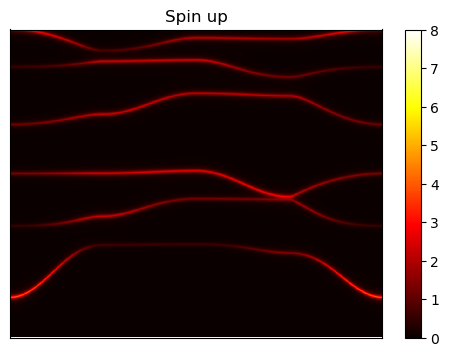

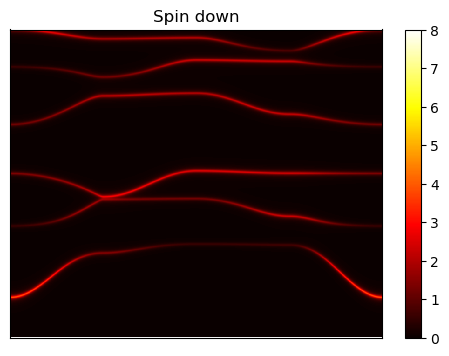

In [16]:
from gGA.utils.make_kpoints import abacus_kpath

kpoints, xpath, _ = abacus_kpath(
    atoms, 
    np.array([
        [0,0,0,200],
        [-0.25,0.25,0,200],
        [0.0,0.5,0,200],
        [0.25,0.25,0,200],
        [0,0,0,1]
    ])
    )

data = atomicdata.copy()
kpoints[:,:2] = np.stack([kpoints[:,:2].sum(-1), kpoints[:,0] - kpoints[:,1]], axis=-1)
data["kpoint"] = kpoints

Es = np.linspace(-8,5, 1000) + gga.E_fermi
GF = gga.compute_GF(Es=Es, data=data, eta=0.06)
ARPES = -(1/np.pi)*GF.imag.diagonal(offset=0, axis1=-1, axis2=-2)
# ARPES = ARPES.sum(-1)


import matplotlib.pyplot as plt
ARPES = np.flip(ARPES, (0,1))
fig, ax = plt.subplots(figsize=(6,4))
m = ax.matshow((ARPES[:,:,0]+ARPES[:,:,2]).T, cmap="hot", vmin=0, vmax=8)
ax.set_aspect('auto')  # override the default 'equal'
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Spin up")
fig.colorbar(m)
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
m = ax.matshow((ARPES[:,:,1]+ARPES[:,:,3]).T, cmap="hot", vmin=0, vmax=8)
ax.set_aspect('auto')  # override the default 'equal'
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Spin down")
fig.colorbar(m)
plt.show()

In [21]:
import numpy as np

kpoints, xpath, _ = abacus_kpath(
    atoms, 
    np.array([
        [0,0,0,200],
        [-0.25,0.25,0,200],
        [0.0,0.5,0,200],
        [0.25,0.25,0,200],
        [0,0,0,1]
    ])
    )
U = 3.5
deltam=0.2

H_up = np.stack([
    2*tm*np.cos((kpoints[:,0]+kpoints[:,1])*2*np.pi)+2*tp*np.cos((kpoints[:,0]-kpoints[:,1])*2*np.pi)-U*deltam,
    2*t*np.cos(kpoints[:,0]*2*np.pi) + 2*t*np.cos(kpoints[:,1]*2*np.pi),
    2*t*np.cos(kpoints[:,0]*2*np.pi) + 2*t*np.cos(kpoints[:,1]*2*np.pi),
    2*tp*np.cos((kpoints[:,0]+kpoints[:,1])*2*np.pi)+2*tm*np.cos((kpoints[:,0]-kpoints[:,1])*2*np.pi)+U*deltam
    ]).T.reshape(-1,2,2)

H_down = np.stack([
    2*tm*np.cos((kpoints[:,0]+kpoints[:,1])*2*np.pi)+2*tp*np.cos((kpoints[:,0]-kpoints[:,1])*2*np.pi)+U*deltam,
    2*t*np.cos(kpoints[:,0]*2*np.pi) + 2*t*np.cos(kpoints[:,1]*2*np.pi),
    2*t*np.cos(kpoints[:,0]*2*np.pi) + 2*t*np.cos(kpoints[:,1]*2*np.pi),
    2*tp*np.cos((kpoints[:,0]+kpoints[:,1])*2*np.pi)+2*tm*np.cos((kpoints[:,0]-kpoints[:,1])*2*np.pi)-U*deltam
    ]).T.reshape(-1,2,2)

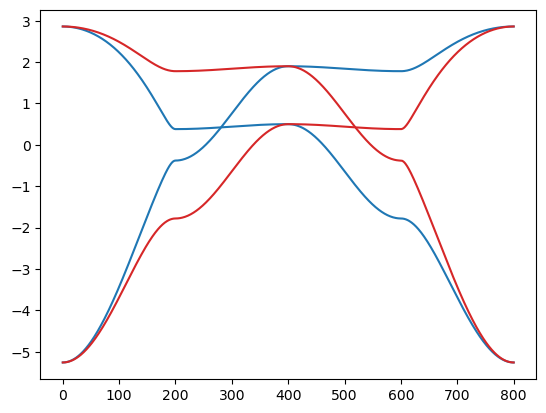

In [24]:
eigvals_up = np.linalg.eigvalsh(H_up)
eigvals_down = np.linalg.eigvalsh(H_down)

plt.plot(eigvals_up, c="tab:blue")
plt.plot(eigvals_down, c="tab:red")
plt.show()